# CUSTOMER CHURN RATE PREDICTION OF TELE - COMMUNICATION DATA SET

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!pip install plotly

In [3]:
import plotly.io as pio
pio.renderers.default = 'iframe'

## Data Cleaning

In [4]:
data = pd.read_csv("customer_churn.csv")
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1376,3164-AALRN,Male,0,No,No,5,Yes,No,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Mailed check,70.00,347.4,Yes
1601,2927-QRRQV,Male,0,Yes,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Electronic check,94.65,4312.5,No
5295,2144-BFDSO,Female,1,Yes,No,50,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),108.75,5431.9,No
1125,8111-SLLHI,Male,1,Yes,No,39,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.65,4284.8,Yes
6293,7977-HXJKU,Male,0,No,Yes,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,397,No


In [5]:
data.drop('customerID',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
def get_cols_unq(data):
    for col in data:
        print(f'{col.lower()} : {data[col].unique()}')

## 1. Preliminary Analysis

### 1.1 check data types

In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [11]:
get_cols_unq(data)

gender : ['Female' 'Male']
seniorcitizen : [0 1]
partner : ['Yes' 'No']
dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
phoneservice : ['No' 'Yes']
multiplelines : ['No phone service' 'No' 'Yes']
internetservice : ['DSL' 'Fiber optic' 'No']
onlinesecurity : ['No' 'Yes' 'No internet service']
onlinebackup : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport : ['No' 'Yes' 'No internet service']
streamingtv : ['No' 'Yes' 'No internet service']
streamingmovies : ['No' 'Yes' 'No internet service']
contract : ['Month-to-month' 'One year' 'Two year']
paperlessbilling : ['Yes' 'No']
paymentmethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
monthlycharges : [29.85 56.95 53.85 ... 63.1  44.2

### 1.2 check for duplicates

In [12]:
data.duplicated().sum()

22

In [13]:
(
    data.loc[data.duplicated(keep = False)]
    .sort_values(["tenure","MonthlyCharges","TotalCharges","Churn"])
)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
5170,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No
6774,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No
4817,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9,No
6706,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.9,No
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
5736,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
3679,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.10,20.1,Yes


In [14]:
len(
    data.loc[data.duplicated(keep = False)]
    .sort_values(["tenure","MonthlyCharges","TotalCharges","Churn"])
)

42

### 1.3 check for missing values

In [15]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.isna().sum().sum()

0

## Preliminary Analysis Observations :

   ### 1.1 Check Data types
   - `Gender` is in string format and has only two values `male` and `female`, it needs to be handled into boolean type means female = 0 and male = 1.
   - `SeniorCitizen` is in correct form like in 0 and 1 in integer type not in boolean type, but its fine.
   - `Partner`, `Dependents`, `PaperlessBilling ` and `Churn` needs to be handled, because it has yes or no in string formal, we need to convert it into boolean type.
   - `Tenure` means how long the customer has relation with that particular network in (months), and this needs to be scaled.
   - In `MultipleLines` the values `No phone service` and `No` are same, so i decided to convert it into `No` and then to boolen format.
   - In `OnlineSecurity`, `OnlineBackup`, `StreamingMovies`, `TechSupport`, `DeviceProtection ` and `StreamingTV` the values `No internet service` and `No` are same, so i decided to convert it into `No` and then to boolen format.
   - `InternetService`, `PaymentMethod`, and `Contract`, these need to be encoded by label encoder or one-hot encoder, because they have more than two categories.
   - `Tenure`, `MonthlyCharges` and `TotalCharges`, these are numerical values which needs to be scaled.
 
  ### 1.2 Check for dupicates
  - There are `42` potential duplicates and those needs to be dropped.
  - They got checked on the basis of `tenure`,`MonthlyCharges`,`TotalCharges` and `Churn`.  
  
  ### 1.3 Check for missing values
  - No missing values

In [17]:
get_cols_unq

<function __main__.get_cols_unq(data)>

In [18]:
(
    data
    .rename(columns=str.lower)
#     .shape # (7043,20)
    .drop_duplicates()
#     .shape # (7021,20)
    .assign(
        multiplelines = lambda df_ : (
            df_
            .multiplelines
            .str.replace("No phone service","No")
            .str.title()
        ),
        
        onlinesecurity = lambda df_ : (
            df_
            .onlinesecurity
            .str.replace("No internet service","No")
            .str.title()
        ),
        
        onlinebackup = lambda df_ : (
            df_
            .onlinebackup
            .str.replace("No internet service","No")
            .str.title()
        ),
        
        deviceprotection = lambda df_ : (
            df_
            .onlinebackup
            .str.replace("No internet service","No")
            .str.title()
        ),
        
        techsupport = lambda df_ : (
            df_
            .onlinebackup
            .str.replace("No internet service","No")
            .str.title()
        ),
        
        streamingtv = lambda df_ : (
            df_
            .onlinebackup
            .str.replace("No internet service","No")
            .str.title()
        ),
        
        streamingmovies = lambda df_ : (
            df_
            .onlinebackup
            .str.replace("No internet service","No")
            .str.title()
        )
    )
#     .multiplelines.unique()
#     .onlinesecurity.unique()
#     .onlinebackup.unique()
#     .deviceprotection.unique()
#     .pipe(get_cols_unq)
    .info()
)

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   seniorcitizen     7021 non-null   int64  
 2   partner           7021 non-null   object 
 3   dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   phoneservice      7021 non-null   object 
 6   multiplelines     7021 non-null   object 
 7   internetservice   7021 non-null   object 
 8   onlinesecurity    7021 non-null   object 
 9   onlinebackup      7021 non-null   object 
 10  deviceprotection  7021 non-null   object 
 11  techsupport       7021 non-null   object 
 12  streamingtv       7021 non-null   object 
 13  streamingmovies   7021 non-null   object 
 14  contract          7021 non-null   object 
 15  paperlessbilling  7021 non-null   object 
 16  paymentmethod     7021 non-null   object 
 17  

In [19]:
get_cols_unq(data)

gender : ['Female' 'Male']
seniorcitizen : [0 1]
partner : ['Yes' 'No']
dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
phoneservice : ['No' 'Yes']
multiplelines : ['No phone service' 'No' 'Yes']
internetservice : ['DSL' 'Fiber optic' 'No']
onlinesecurity : ['No' 'Yes' 'No internet service']
onlinebackup : ['Yes' 'No' 'No internet service']
deviceprotection : ['No' 'Yes' 'No internet service']
techsupport : ['No' 'Yes' 'No internet service']
streamingtv : ['No' 'Yes' 'No internet service']
streamingmovies : ['No' 'Yes' 'No internet service']
contract : ['Month-to-month' 'One year' 'Two year']
paperlessbilling : ['Yes' 'No']
paymentmethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
monthlycharges : [29.85 56.95 53.85 ... 63.1  44.2

In [20]:
def clean_data(df):
    return (
        df
        .rename(columns=str.lower)
    #     .shape # (7043,20)
        .drop_duplicates()
    #     .shape # (7021,20)
        .assign(
            multiplelines = lambda df_ : (
                df_
                .multiplelines
                .str.replace("No phone service","No")
                .str.title()
            ),

            onlinesecurity = lambda df_ : (
                df_
                .onlinesecurity
                .str.replace("No internet service","No")
                .str.title()
            ),

            onlinebackup = lambda df_ : (
                df_
                .onlinebackup
                .str.replace("No internet service","No")
                .str.title()
            ),

            deviceprotection = lambda df_ : (
                df_
                .onlinebackup
                .str.replace("No internet service","No")
                .str.title()
            ),

            techsupport = lambda df_ : (
                df_
                .onlinebackup
                .str.replace("No internet service","No")
                .str.title()
            ),

            streamingtv = lambda df_ : (
                df_
                .onlinebackup
                .str.replace("No internet service","No")
                .str.title()
            ),

            streamingmovies = lambda df_ : (
                df_
                .onlinebackup
                .str.replace("No internet service","No")
                .str.title()
            ),
            
            totalcharges = lambda df_ : (
                df_
                .totalcharges
                .pipe(lambda ser : pd.to_numeric(ser,errors="coerce"))
            )
        )    
    )

In [21]:
df = clean_data(data)
df.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4264,Female,1,No,No,46,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.45,4863.85,No
569,Female,0,No,No,11,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),40.40,422.60,No
5289,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,115.10,6993.65,No
3553,Male,0,No,No,62,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),23.40,1429.65,No
4191,Female,0,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.75,6871.70,No


In [22]:
get_cols_unq(df)

gender : ['Female' 'Male']
seniorcitizen : [0 1]
partner : ['Yes' 'No']
dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
phoneservice : ['No' 'Yes']
multiplelines : ['No' 'Yes']
internetservice : ['DSL' 'Fiber optic' 'No']
onlinesecurity : ['No' 'Yes']
onlinebackup : ['Yes' 'No']
deviceprotection : ['Yes' 'No']
techsupport : ['Yes' 'No']
streamingtv : ['Yes' 'No']
streamingmovies : ['Yes' 'No']
contract : ['Month-to-month' 'One year' 'Two year']
paperlessbilling : ['Yes' 'No']
paymentmethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
monthlycharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
totalcharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
churn : ['No' 'Yes']


## EDA - Exploratory Data Analysis of Cleaned Data

In [23]:
import seaborn as sns

import eda_helper_functions

from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler
)

from sklearn.pipeline import Pipeline

## 1. High Level Summary of The Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   seniorcitizen     7021 non-null   int64  
 2   partner           7021 non-null   object 
 3   dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   phoneservice      7021 non-null   object 
 6   multiplelines     7021 non-null   object 
 7   internetservice   7021 non-null   object 
 8   onlinesecurity    7021 non-null   object 
 9   onlinebackup      7021 non-null   object 
 10  deviceprotection  7021 non-null   object 
 11  techsupport       7021 non-null   object 
 12  streamingtv       7021 non-null   object 
 13  streamingmovies   7021 non-null   object 
 14  contract          7021 non-null   object 
 15  paperlessbilling  7021 non-null   object 
 16  paymentmethod     7021 non-null   object 
 17  

In [25]:
pd.to_numeric(df.totalcharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7021, dtype: float64

In [26]:
df[pd.to_numeric(df.totalcharges,errors="coerce").isnull()].shape

(11, 20)

In [27]:
df = df[df.totalcharges!=" "]

In [28]:
df.shape

(7021, 20)

In [29]:
df["totalcharges"] = pd.to_numeric(df.totalcharges)

In [30]:
df['totalcharges'].dtypes

dtype('float64')

In [31]:
df['churn'].replace({"Yes":1, "No":0},inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16424\1110934555.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16424\1110934555.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [32]:
df.churn.dtype

dtype('int64')

## Isolation Forest for Outliers

In [33]:
forest = IsolationForest(n_estimators=10,random_state=42)

## pairplots

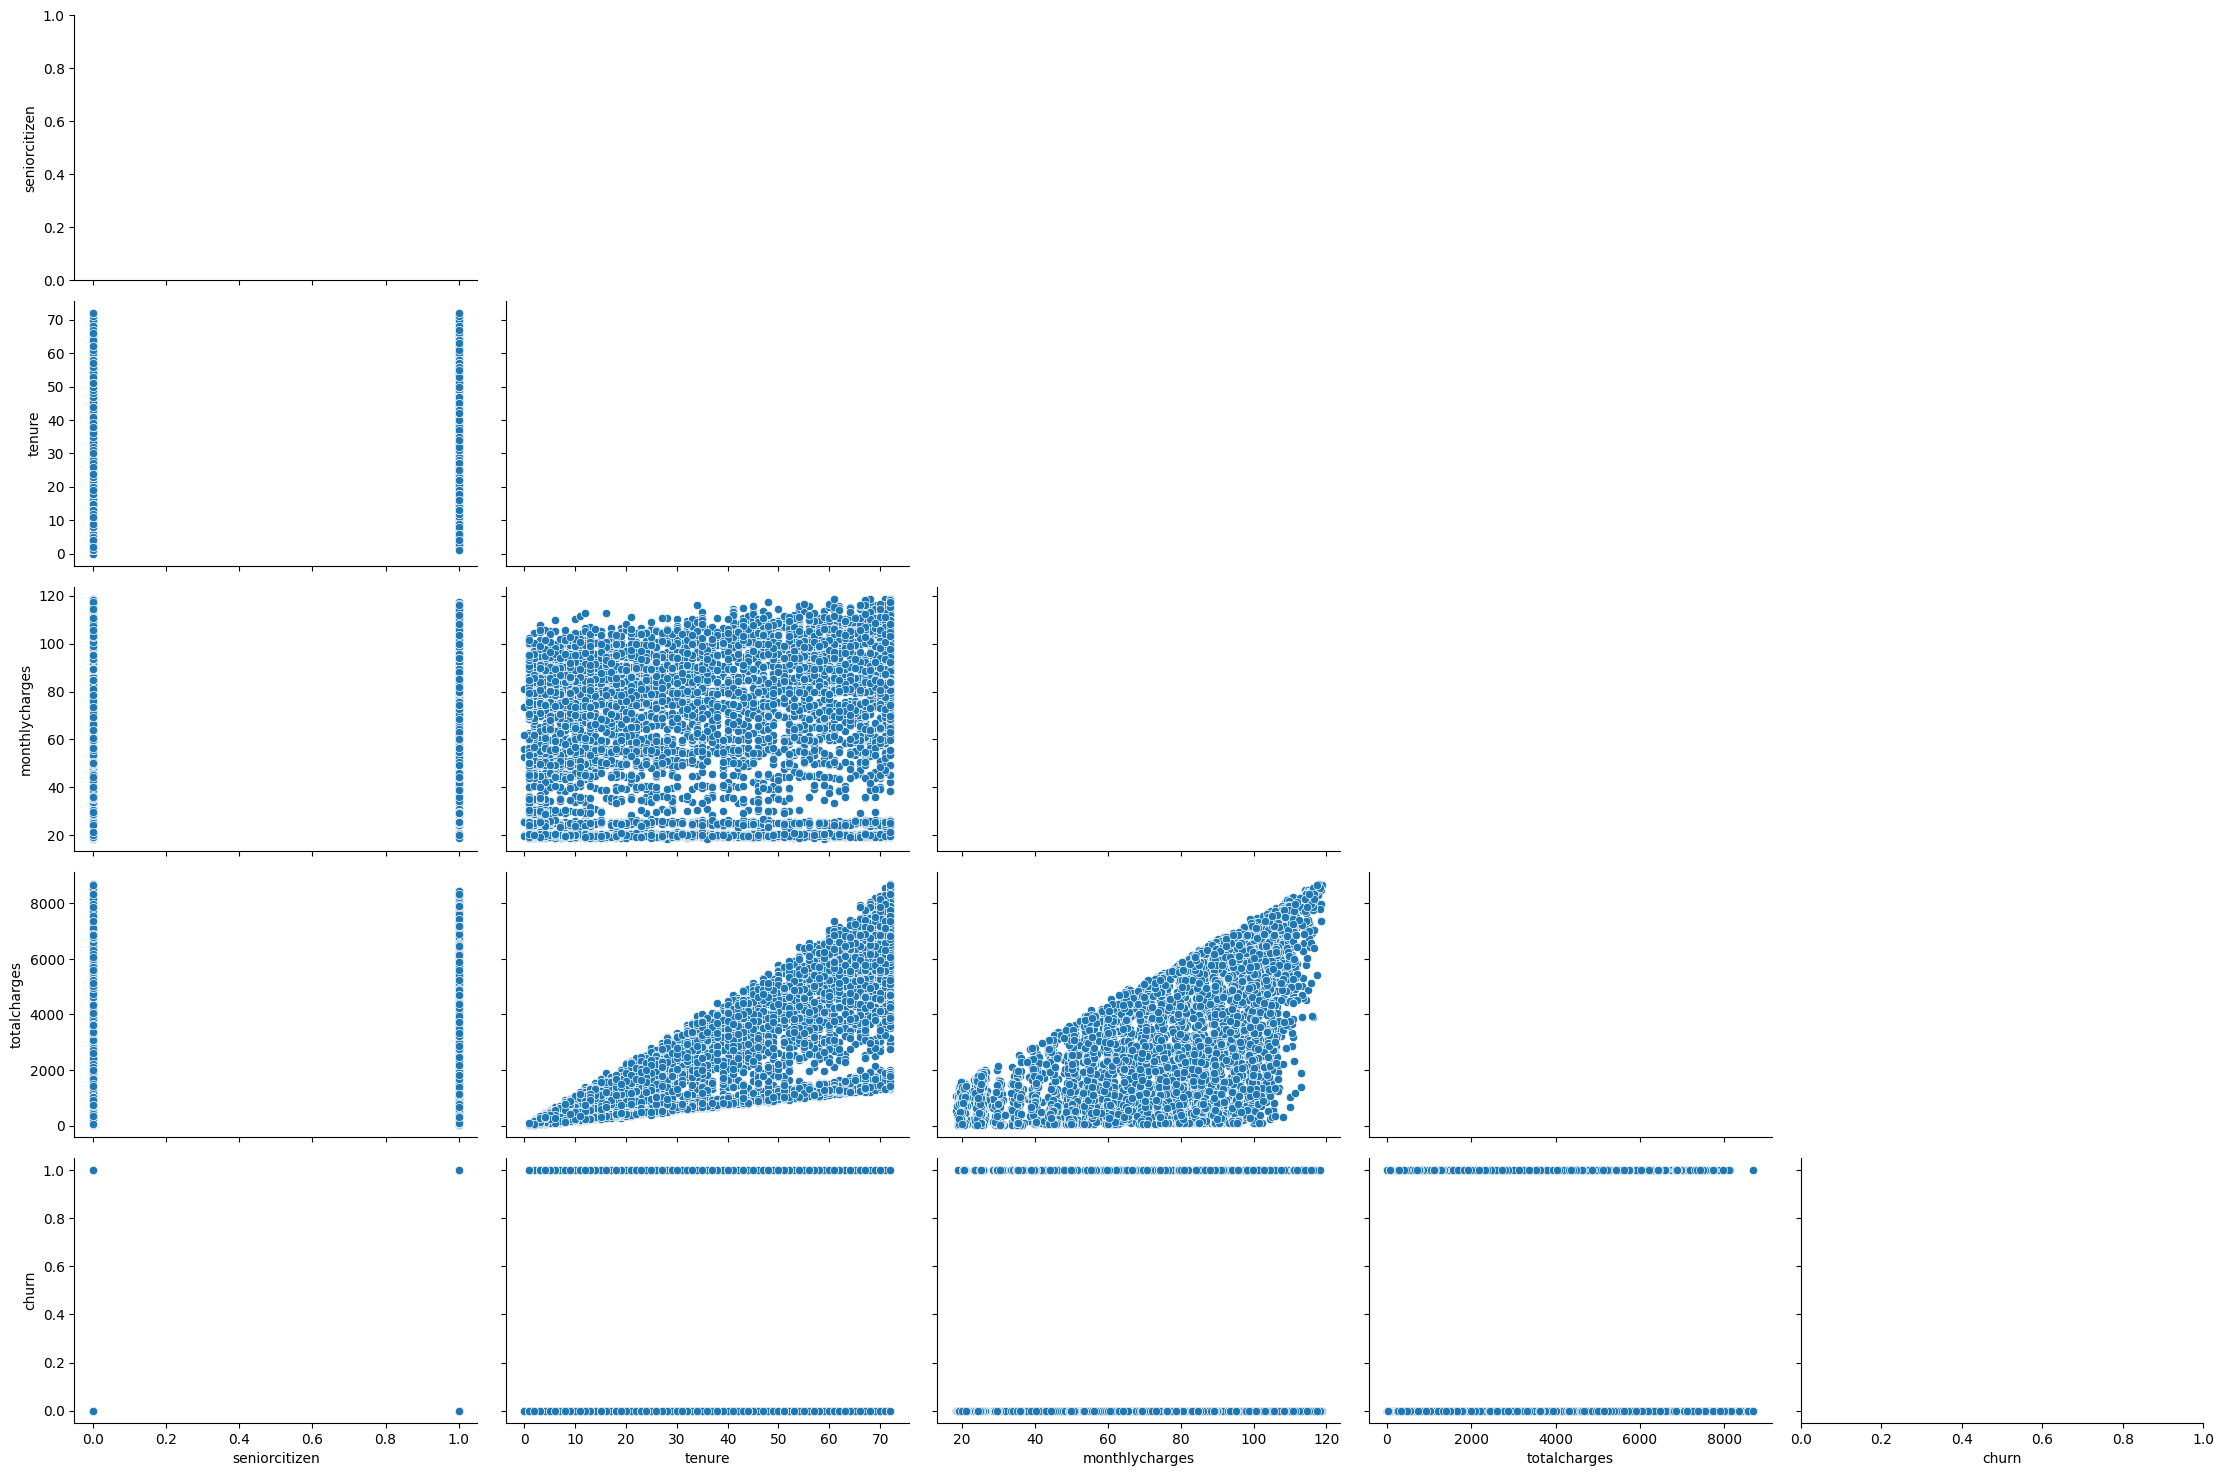

In [34]:
eda_helper_functions.pair_plots(df)

In [35]:
df.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2434,Female,0,Yes,Yes,3,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,19.65,60.65,0
4583,Female,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,90.10,6310.90,0
3194,Female,1,Yes,No,43,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,No,Credit card (automatic),55.55,2342.20,1
4576,Male,0,Yes,Yes,16,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Electronic check,19.75,313.40,0
3152,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,No,No,No,No,One year,Yes,Bank transfer (automatic),95.85,2475.35,0


## Correlation Analysis

### for numeric features

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



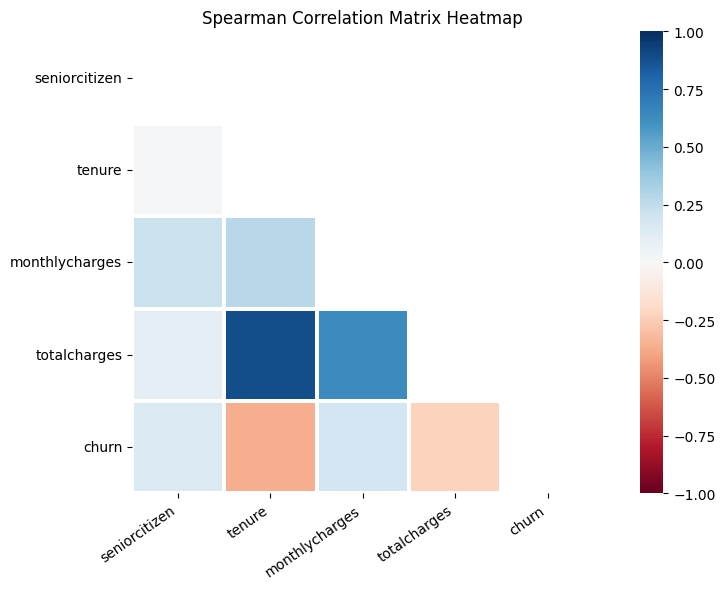

In [36]:
eda_helper_functions.correlation_heatmap(df)

### for categorical features

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



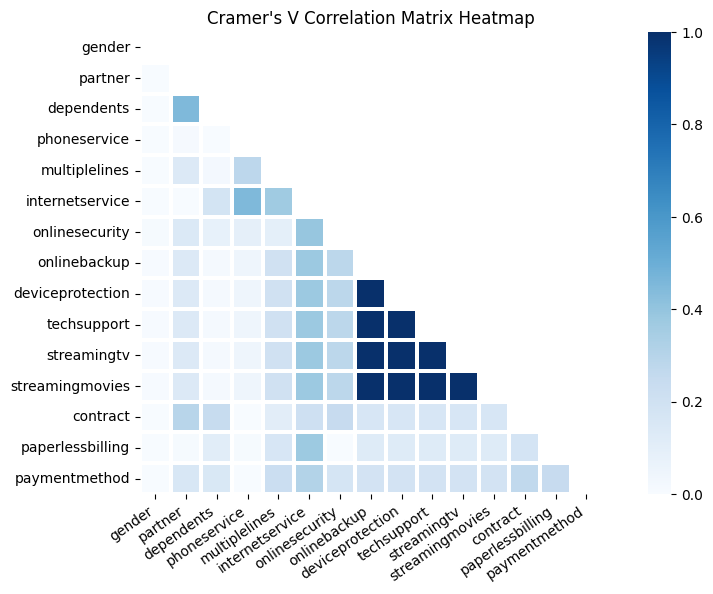

In [37]:
eda_helper_functions.cramersV_heatmap(df)

In [38]:
eda_helper_functions.cat_summary(df,"gender")

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7021, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 7,021 / 7,021 rows


,
count,7021
unique,2
top,Male
freq,3541


,count,percentage
category,,
Male,3541,0.504344
Female,3480,0.495656


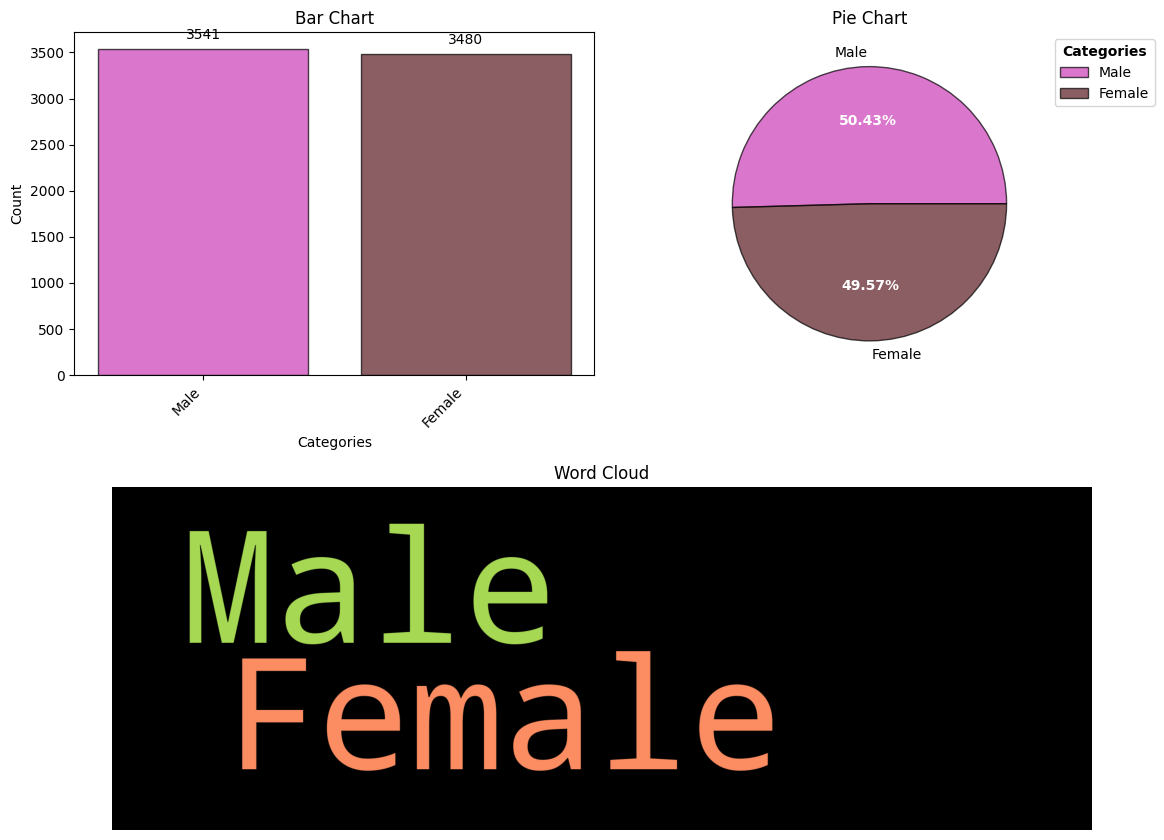

In [39]:
eda_helper_functions.cat_univar_plots(df,"gender")

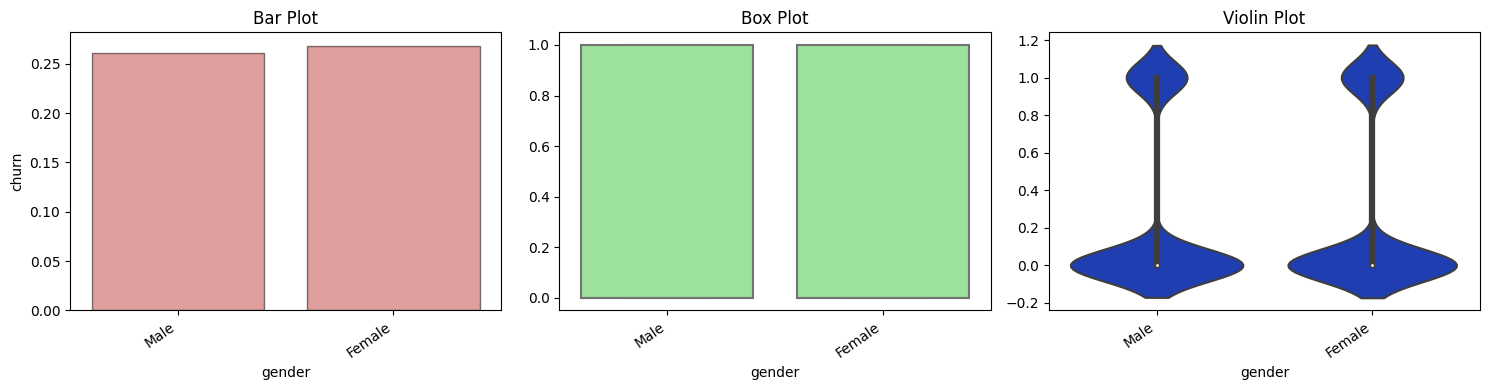

In [40]:
eda_helper_functions.num_cat_bivar_plots(data=df,num_var="churn",cat_var="gender")

In [41]:
eda_helper_functions.num_cat_hyp_testing(df,"churn","gender")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 0.5389788532481279
- p-value              : 0.46288075409503704
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables churn and gender are not associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 0.5390142516706565
- p-value              : 0.46284153983398213
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables churn and gender are not associated to each other


In [42]:
df.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [43]:
df.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3370,Female,0,Yes,Yes,53,No,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),48.70,2495.2,0
2703,Female,0,No,No,1,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.10,50.1,1
5781,Female,0,No,No,27,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,89.20,2383.6,0
6711,Female,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.35,4889.2,0
5862,Female,0,No,No,17,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.50,1165.6,0


In [44]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

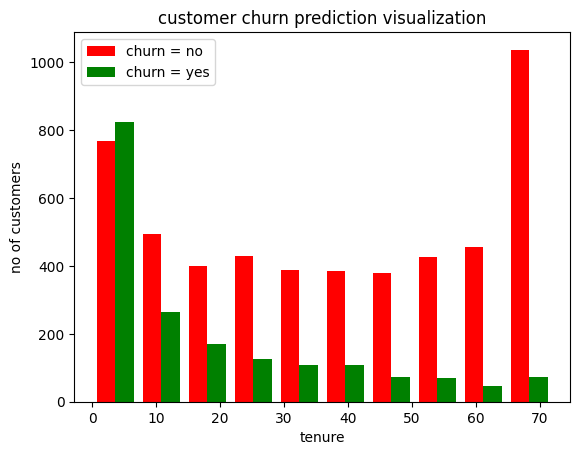

In [45]:
tenure_churn_no = df[df.churn==0].tenure
tenure_churn_yes = df[df.churn==1].tenure

plt.title("customer churn prediction visualization")
plt.xlabel("tenure")
plt.ylabel("no of customers")

plt.hist([tenure_churn_no,tenure_churn_yes],color=["red","green"],label=["churn = no","churn = yes"])
plt.legend()
plt.show()

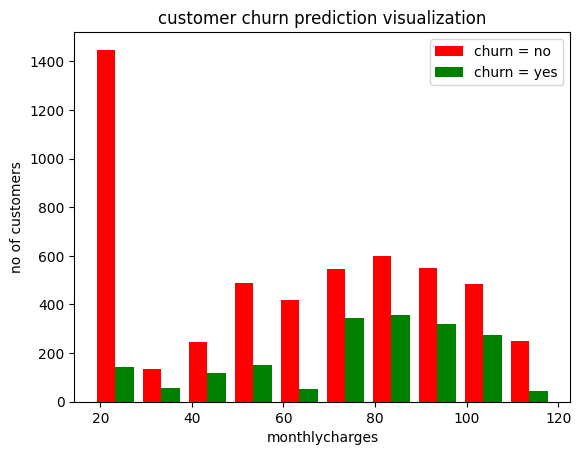

In [46]:
monthlycharges_churn_no = df[df.churn==0].monthlycharges
monthlycharges_churn_yes = df[df.churn==1].monthlycharges

plt.title("customer churn prediction visualization")
plt.xlabel("monthlycharges")
plt.ylabel("no of customers")

plt.hist([monthlycharges_churn_no,monthlycharges_churn_yes],color=["red","green"],label=["churn = no","churn = yes"])
plt.legend()
plt.show()

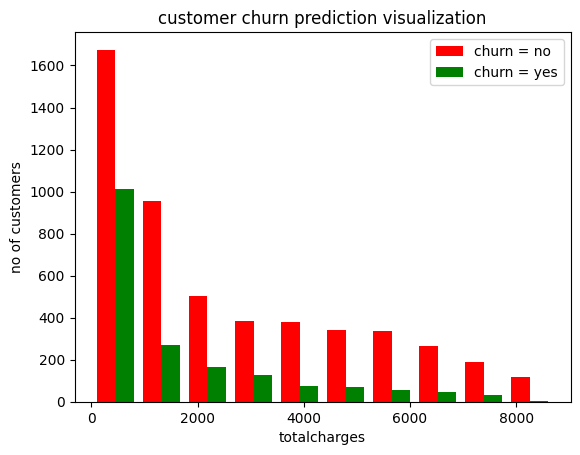

In [47]:
totalcharges_churn_no = df[df.churn==0].totalcharges
totalcharges_churn_yes = df[df.churn==1].totalcharges

plt.title("customer churn prediction visualization")
plt.xlabel("totalcharges")
plt.ylabel("no of customers")

plt.hist([totalcharges_churn_no,totalcharges_churn_yes],color=["red","green"],label=["churn = no","churn = yes"])
plt.legend()
plt.show()

In [48]:
# functions for transforming data
def transform_data(data):
    df = pd.DataFrame(data)

    # one hot encoding
    cols_to_encode = ["contract", "internetservice", "paymentmethod"]
    encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    encoded_features = encoder.fit_transform(df[cols_to_encode])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(input_features=cols_to_encode))
    df = pd.concat([df.drop(cols_to_encode, axis=1), encoded_df], axis=1)
    
    # scaling
    cols_to_scale = ["tenure", "monthlycharges", "totalcharges"]
    scaler = MinMaxScaler()
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    
    # rounding to 7 decimal places
    df[cols_to_scale] = df[cols_to_scale].round(7)
    
    return df

transformed_data = transform_data(df)
transformed_data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_Month-to-month,contract_One year,contract_Two year,internetservice_DSL,internetservice_Fiber optic,internetservice_No,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,Female,0.0,Yes,No,0.013889,No,No,No,Yes,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0.0,No,No,0.472222,Yes,No,Yes,No,No,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Male,0.0,No,No,0.027778,Yes,No,Yes,Yes,Yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0.0,No,No,0.625000,No,No,Yes,No,No,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Female,0.0,No,No,0.027778,Yes,No,No,No,No,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [50]:
def get_cat_features(df):
    for col in df:
        if df[col].dtypes == "object":
            print(f'{col} : {df[col].unique()}')

In [51]:
get_cat_features(df)

gender : ['Female' 'Male']
partner : ['Yes' 'No']
dependents : ['No' 'Yes']
phoneservice : ['No' 'Yes']
multiplelines : ['No' 'Yes']
internetservice : ['DSL' 'Fiber optic' 'No']
onlinesecurity : ['No' 'Yes']
onlinebackup : ['Yes' 'No']
deviceprotection : ['Yes' 'No']
techsupport : ['Yes' 'No']
streamingtv : ['Yes' 'No']
streamingmovies : ['Yes' 'No']
contract : ['Month-to-month' 'One year' 'Two year']
paperlessbilling : ['Yes' 'No']
paymentmethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [52]:
yes_no_cols = ["partner", "dependents", "phoneservice","multiplelines","onlinesecurity","onlinebackup",
               "deviceprotection","techsupport","streamingtv","streamingmovies","paperlessbilling"]

for col in yes_no_cols:
    df[col].replace({"Yes": 1,"No" : 0},inplace=True)

In [53]:
df.dtypes

gender               object
seniorcitizen         int64
partner               int64
dependents            int64
tenure                int64
phoneservice          int64
multiplelines         int64
internetservice      object
onlinesecurity        int64
onlinebackup          int64
deviceprotection      int64
techsupport           int64
streamingtv           int64
streamingmovies       int64
contract             object
paperlessbilling      int64
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [54]:
df['gender'].replace({"Male":1,"Female":0},inplace=True)

In [55]:
cols_to_encode = ['contract', 'internetservice', 'paymentmethod']

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

encoded_features = encoder.fit_transform(df[cols_to_encode])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(input_features=cols_to_encode))
df = pd.concat([df.drop(cols_to_encode, axis=1), encoded_df], axis=1)

In [56]:
df.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_Month-to-month,contract_One year,contract_Two year,internetservice_DSL,internetservice_Fiber optic,internetservice_No,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
6280,0.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1368,1.0,0.0,0.0,0.0,54.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
874,1.0,0.0,0.0,1.0,45.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
294,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1589,0.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
df.columns.to_list()

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'monthlycharges',
 'totalcharges',
 'churn',
 'contract_Month-to-month',
 'contract_One year',
 'contract_Two year',
 'internetservice_DSL',
 'internetservice_Fiber optic',
 'internetservice_No',
 'paymentmethod_Bank transfer (automatic)',
 'paymentmethod_Credit card (automatic)',
 'paymentmethod_Electronic check',
 'paymentmethod_Mailed check']

In [58]:
cols_to_scale = ["tenure","monthlycharges","totalcharges"]

scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [59]:
df.sample(5).shape

(5, 27)

In [60]:
df.isna().sum().sum()

605

In [61]:
df.shape

(7043, 27)

In [62]:
df = df.dropna()
df.shape

(6988, 27)

In [63]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'monthlycharges', 'totalcharges', 'churn',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [64]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_Month-to-month,contract_One year,contract_Two year,internetservice_DSL,internetservice_Fiber optic,internetservice_No,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## different classification models

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [66]:
svc = SVC(kernel='sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
bc = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
X = df.drop('churn',axis='columns')
y = df['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [70]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.6502145922746781, 0.34739454094292804)

In [71]:
X_test.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'monthlycharges', 'totalcharges',
       'contract_Month-to-month', 'contract_One year', 'contract_Two year',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [72]:
X_test.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_Month-to-month,contract_One year,contract_Two year,internetservice_DSL,internetservice_Fiber optic,internetservice_No,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
6607,1.0,0.0,0.0,1.0,0.013889,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1727,1.0,0.0,0.0,0.0,0.430556,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
699,1.0,0.0,1.0,1.0,1.000000,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1507,1.0,0.0,0.0,0.0,0.750000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3449,0.0,0.0,1.0,1.0,0.722222,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [73]:
df.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,contract_Month-to-month,contract_One year,contract_Two year,internetservice_DSL,internetservice_Fiber optic,internetservice_No,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
6334,0.0,0.0,0.0,1.0,0.930556,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5592,1.0,0.0,0.0,0.0,0.180556,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4362,0.0,0.0,1.0,0.0,0.680556,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
694,0.0,1.0,0.0,0.0,0.305556,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1705,0.0,1.0,1.0,0.0,0.763889,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
data.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6233,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,57.5,No
4742,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.80,1521.2,No
384,Male,0,No,No,48,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.10,5067.45,No
4940,Male,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.45,1261.35,No
1921,Male,0,Yes,Yes,70,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.95,5931.75,No


In [75]:
df.dtypes

gender                                     float64
seniorcitizen                              float64
partner                                    float64
dependents                                 float64
tenure                                     float64
phoneservice                               float64
multiplelines                              float64
onlinesecurity                             float64
onlinebackup                               float64
deviceprotection                           float64
techsupport                                float64
streamingtv                                float64
streamingmovies                            float64
paperlessbilling                           float64
monthlycharges                             float64
totalcharges                               float64
churn                                      float64
contract_Month-to-month                    float64
contract_One year                          float64
contract_Two year              

In [78]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print(f"model : {name}")
    print(f"accuracy : {current_accuracy}")
    print(f"precision : {current_precision}")
    print("\n","*"*50,"\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

model : SVC
accuracy : 0.6502145922746781
precision : 0.34739454094292804

 ************************************************** 

model : KN
accuracy : 0.7410586552217453
precision : 0.5076923076923077

 ************************************************** 

model : DT
accuracy : 0.7896995708154506
precision : 0.6730769230769231

 ************************************************** 

model : LR
accuracy : 0.7989985693848355
precision : 0.6523297491039427

 ************************************************** 

model : RF
accuracy : 0.7925608011444921
precision : 0.6496062992125984

 ************************************************** 

model : AdaBoost
accuracy : 0.7918454935622318
precision : 0.6373626373626373

 ************************************************** 

model : BgC
accuracy : 0.7846924177396281
precision : 0.6164874551971327

 ************************************************** 

model : ETC
accuracy : 0.7689556509298998
precision : 0.5811320754716981

 ***************************

## Model Building - Using ANN Algorithm

In [79]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6560 - loss: 0.6148
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7488 - loss: 0.5002
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.4598
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8046 - loss: 0.4222
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4462
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4215
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4414
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4250
Epoch 9/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4217
Epoch 10/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4270
Epoch 11/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4245
Epoch 12/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [80]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7825 - loss: 0.4495


[0.4386041760444641, 0.7861230373382568]

In [81]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.44730183],
       [0.11707662],
       [0.00515089],
       [0.01172743],
       [0.15957108]], dtype=float32)

In [82]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [83]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1032
         1.0       0.63      0.44      0.52       366

    accuracy                           0.79      1398
   macro avg       0.73      0.68      0.69      1398
weighted avg       0.77      0.79      0.77      1398



Text(95.72222222222221, 0.5, 'Truth')

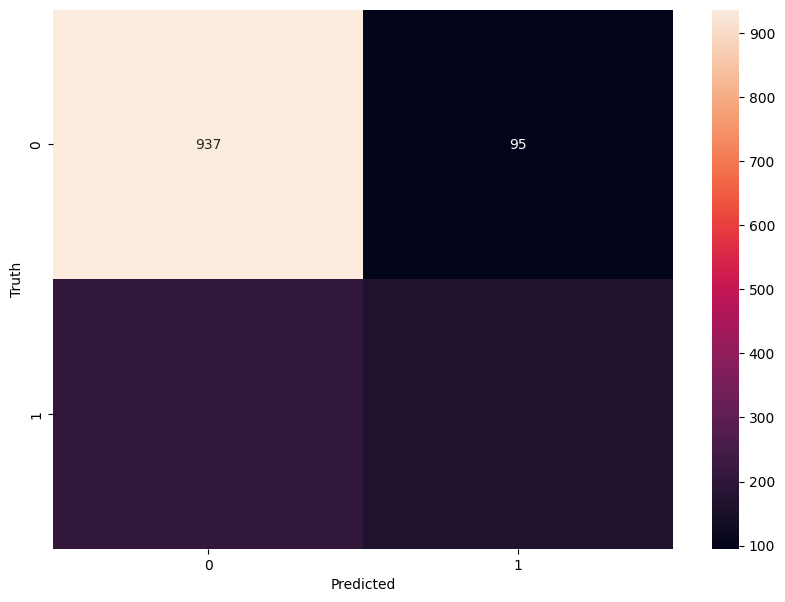

In [84]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Accuracy

In [85]:
acc_score = round((862+229)/(862+229+137+179),2)
acc_score

0.78

### Precision for 0 class. i.e. Precision for customers who did not churn

In [90]:
prec_score = round(862/(862+179),2)
prec_score

0.83

### Precision for 1 class. i.e. Precision for customers who actually churned

In [91]:
round(229/(229+137),2)

0.63

### Recall for 0 class

In [92]:
round(862/(862+137),2)

0.86

In [93]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),
                               'Accuracy': accuracy_scores,
                               'Precision': precision_scores})

# Add a new row for the ANN model using concat
new_row = pd.DataFrame({'Algorithm': ['ANN Model'],
                        'Accuracy': [acc_score],
                        'Precision': [prec_score]})
performance_df = pd.concat([performance_df, new_row], ignore_index=True)

# Sort the DataFrame by precision in descending order
performance_df = performance_df.sort_values(by='Precision', ascending=False)
performance_df

# svc = SVC(kernel='sigmoid',gamma = 1.0)
# knc = KNeighborsClassifier()
# dtc = DecisionTreeClassifier(max_depth = 5)
# lrc = LogisticRegression(solver='liblinear',penalty='l1')
# rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
# abc = AdaBoostClassifier(n_estimators = 50,random_state = 2)
# bc = BaggingClassifier(n_estimators = 50,random_state = 2)
# etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
# gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
# xgb = XGBClassifier(n_estimators = 50,random_state = 2)

,Algorithm,Accuracy,Precision
10,ANN Model,0.780000,0.830000
2,DT,0.789700,0.673077
3,LR,0.798999,0.652330
9,xgb,0.798999,0.650177
4,RF,0.792561,0.649606
8,GBDT,0.788984,0.641434
5,AdaBoost,0.791845,0.637363
6,BgC,0.784692,0.616487
7,ETC,0.768956,0.581132
1,KN,0.741059,0.507692


In [ ]:
# !pip install optuna

In [94]:
import optuna

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def objective(trial):
    n_units = trial.suggest_int("n_units", 16, 128)  # Number of units in hidden layer
    n_layers = trial.suggest_int("n_layers", 1, 3)   # Number of hidden layers
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-2)
    dropout_rate = trial.suggest_uniform("dropout_rate", 0.2, 0.5)

    # Build the Keras model
    model1 = keras.Sequential()
    model1.add(keras.layers.Input(shape=(X_train.shape[1],)))
    
    # Add hidden layers based on chosen hyperparameters
    for _ in range(n_layers):
        model1.add(keras.layers.Dense(n_units, activation="relu"))
        model1.add(keras.layers.Dropout(dropout_rate))
        
    model1.add(keras.layers.Dense(1, activation="sigmoid"))  # Output layer for binary classification

    # Compile the model
    model1.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Train the model
    history = model1.fit(
        X_train_split, y_train_split,
        validation_data=(X_val, y_val),
        batch_size=32,
        epochs=100,
        verbose=0
    )

    # Get the validation accuracy of the last epoch
    val_accuracy = history.history["val_accuracy"][-1]
    
    # Optuna minimizes the objective, so return the negative accuracy
    return -val_accuracy

# Step 3: Run the Optuna study to find the best hyperparameters
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Step 4: Get the best hyperparameters
print("Best hyperparameters:", study.best_params)


[I 2024-11-22 02:40:25,538] A new study created in memory with name: no-name-1b5d7f53-eb9c-458b-98f6-c8faa33ad231
[I 2024-11-22 02:40:52,714] Trial 0 finished with value: -0.7844364643096924 and parameters: {'n_units': 93, 'n_layers': 3, 'learning_rate': 7.414310924546686e-05, 'dropout_rate': 0.21226618082240992}. Best is trial 0 with value: -0.7844364643096924.
[I 2024-11-22 02:41:16,561] Trial 1 finished with value: -0.7978532910346985 and parameters: {'n_units': 124, 'n_layers': 1, 'learning_rate': 0.001566865592895726, 'dropout_rate': 0.3251255054523632}. Best is trial 1 with value: -0.7978532910346985.
[I 2024-11-22 02:41:40,697] Trial 2 finished with value: -0.7862253785133362 and parameters: {'n_units': 106, 'n_layers': 2, 'learning_rate': 0.0006844402752981416, 'dropout_rate': 0.36677392602670106}. Best is trial 1 with value: -0.7978532910346985.
[I 2024-11-22 02:42:00,761] Trial 3 finished with value: -0.7933810353279114 and parameters: {'n_units': 90, 'n_layers': 1, 'learning

Best hyperparameters: {'n_units': 17, 'n_layers': 1, 'learning_rate': 0.00018723535622549846, 'dropout_rate': 0.3154811604419353}


In [113]:
best_params = study.best_params

def build_best_model(best_params):
    new_model = keras.Sequential()
    new_model.add(keras.layers.Input(shape=(X_train.shape[1],)))
    
    for _ in range(best_params['n_layers']):
        new_model.add(keras.layers.Dense(best_params['n_units'], activation="relu"))
        new_model.add(keras.layers.Dropout(best_params['dropout_rate']))
    
    new_model.add(keras.layers.Dense(1, activation="sigmoid"))
    
    new_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

new_model = build_best_model(best_params)

In [114]:
history = new_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=30,  # Increase epochs for the final training run if needed
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.4463 - val_accuracy: 0.7952 - val_loss: 0.4457
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7974 - loss: 0.4359 - val_accuracy: 0.7970 - val_loss: 0.4458
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4527 - val_accuracy: 0.7952 - val_loss: 0.4455
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7972 - loss: 0.4477 - val_accuracy: 0.7961 - val_loss: 0.4453
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.4499 - val_accuracy: 0.7979 - val_loss: 0.4453
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7873 - loss: 0.4445 - val_accuracy: 0.7961 - val_loss: 0.4452
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7854 - loss: 0.4514 - val_accuracy: 0.7934 - val_loss: 0.4451
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7959 - loss: 0.4446 - val_accuracy: 0.

In [123]:
with open('new_model.pkl', 'wb') as file:
    pickle.dump(new_model, file)

## After Optuna Hyperparameter Tuning Results Are :

In [115]:
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.7849 - loss: 0.4397
Test accuracy: 0.7911


## Optuna Visulaizations

In [116]:
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances

In [117]:
plot_optimization_history(study).show()

In [118]:
plot_parallel_coordinate(study).show()

In [119]:
plot_slice(study).show()

In [120]:
plot_param_importances(study).show()

# Main Points :

   ### Data Cleaning:
 - Focused on:
     - `missing values`
     - `duplicates`
     - `checked for valid data types or not`
     - `checked for data inconsistency`
     - `replaced "no internet service" and "no phone service" to no`
     
  ### EDA :
  - In interval of [0 - 10] and [60 - 70] there are many customers who didn't left the network, when analysed tenure and no of customers.
  - In interval of [20 - 40] there are many customer who didn't left the network compared to another intervals, when analysed monthly charges and no of customers.
  - In interval [0 - 2000] there are many customers who didn't left the network, when analysed total charges and no of customers.
  - Performed Hypothesis testing on `gender` using Annova and Krushkal - Wallis test and understood that `gender` is not associated with `churn`.
  - `device protection`,`tech support`,`streaming tv`,`streaming movies` are strongly correlated which becomes over fitting for the model.
  
  ### Model Building :
 - Model Building using ANN deep learning algorithm.
 - trained model for 30 Epochs.
  
  ### Evaluation Metrics:
 - got `78%` accuracy before hyper parameter tuning.
 - after hyper parameter tuning using `Optuna` achieved `80%` accuracy.